In [1]:
# coding: utf-8

import xarray as xr
import numpy as np
from glob import glob
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import calendar
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.colors as cls
import matplotlib as mpl
import copy
import pandas as pd

In [2]:
# Opening a dataset just to get the lat/lon of the grid
aux1 = xr.open_dataset('/chinook/marinier/CONUS_2D/CTRL/2000/wrf2d_d01_CTRL_T2_200010-200012.nc', engine='netcdf4') 

In [3]:
fo = '/chinook/cruman/Data/Near0EventsCases'
# Get the average number of hours near 0

near0PGW_near0CTRL = np.zeros((14,12,1015,1359))
near0PGW_p4CTRL = np.zeros((14,12,1015,1359))
near0PGW_m4CTRL = np.zeros((14,12,1015,1359))
m4PGW_m4CTRL = np.zeros((14,12,1015,1359))
p4PGW_p4CTRL = np.zeros((14,12,1015,1359))

near0PGW = np.zeros((14,12,1015,1359))
m4PGW = np.zeros((14,12,1015,1359))
p4PGW = np.zeros((14,12,1015,1359))

near0CTRL = np.zeros((14,12,1015,1359))
m4CTRL = np.zeros((14,12,1015,1359))
p4CTRL = np.zeros((14,12,1015,1359))
# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")        
        
        aux = pickle.load( open(f'{fo}/t2m_n0PGW_n0CTRL_{y}_{m:02d}.p', 'rb'))
        aux2 = pickle.load( open(f'{fo}/t2m_m4PGW_m4CTRL_{y}_{m:02d}.p', 'rb'))
        aux3 = pickle.load( open(f'{fo}/t2m_p4PGW_p4CTRL_{y}_{m:02d}.p', 'rb'))
        
        aux4 = pickle.load( open(f'{fo}/t2m_near0PGW_{y}_{m:02d}.p', 'rb'))
        aux5 = pickle.load( open(f'{fo}/t2m_minus4PGW_{y}_{m:02d}.p', 'rb'))
        aux6 = pickle.load( open(f'{fo}/t2m_plus4PGW_{y}_{m:02d}.p', 'rb'))
        
        aux7 = pickle.load( open(f'{fo}/t2m_near0CTRL_{y}_{m:02d}.p', 'rb'))
        aux8 = pickle.load( open(f'{fo}/t2m_minus4CTRL_{y}_{m:02d}.p', 'rb'))
        aux9 = pickle.load( open(f'{fo}/t2m_plus4CTRL_{y}_{m:02d}.p', 'rb'))
        
                
        near0PGW_near0CTRL[i,m-1] += aux
        m4PGW_m4CTRL[i,m-1] += aux2
        p4PGW_p4CTRL[i,m-1] += aux3
        
        near0PGW[i,m-1] += aux4
        m4PGW[i,m-1] += aux5
        p4PGW[i,m-1] += aux6     
        
        near0CTRL[i,m-1] += aux7
        m4CTRL[i,m-1] += aux8
        p4CTRL[i,m-1] += aux9     
        
        #near0PGW_p4CTRL[i,m-1] += aux7 
        #near0PGW_m4CTRL[i,m-1] += aux8
                
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        



Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [4]:
def removeCorners(aux, n=25):
    aux[:n,:] = np.nan
    aux[:,:n] = np.nan
    aux[-n:,:] = np.nan
    aux[:,-n:] = np.nan
    
    return aux

In [5]:
total_near0PGW_near0CTRL_month = np.sum(near0PGW_near0CTRL, axis=0)
total_m4PGW_m4CTRL_month = np.sum(m4PGW_m4CTRL, axis=0)
total_p4PGW_p4CTRL_month = np.sum(p4PGW_p4CTRL, axis=0)
total_near0PGW_month = np.sum(near0PGW, axis=0)
total_m4PGW_month = np.sum(m4PGW, axis=0)
total_p4PGW_month = np.sum(p4PGW, axis=0)

total_near0CTRL_month = np.sum(near0CTRL, axis=0)
total_m4CTRL_month = np.sum(m4CTRL, axis=0)
total_p4CTRL_month = np.sum(p4CTRL, axis=0)

total_near0PGW_near0CTRL = np.sum(total_near0PGW_near0CTRL_month, axis=0)
total_m4PGW_m4CTRL = np.sum(total_m4PGW_m4CTRL_month, axis=0)
total_p4PGW_p4CTRL = np.sum(total_p4PGW_p4CTRL_month, axis=0)
total_near0PGW = np.sum(total_near0PGW_month, axis=0)
total_m4PGW = np.sum(total_m4PGW_month, axis=0)
total_p4PGW = np.sum(total_p4PGW_month, axis=0)

total_near0CTRL = np.sum(total_near0CTRL_month, axis=0)
total_m4CTRL = np.sum(total_m4CTRL_month, axis=0)
total_p4CTRL = np.sum(total_p4CTRL_month, axis=0)

In [6]:
total_near0PGW_near0CTRL = removeCorners(total_near0PGW_near0CTRL)
total_m4PGW_m4CTRL = removeCorners(total_m4PGW_m4CTRL)
total_p4PGW_p4CTRL = removeCorners(total_p4PGW_p4CTRL)

total_near0PGW = removeCorners(total_near0PGW)
total_m4PGW = removeCorners(total_m4PGW)
total_p4PGW = removeCorners(total_p4PGW)

total_near0CTRL = removeCorners(total_near0CTRL)
total_m4CTRL = removeCorners(total_m4CTRL)
total_p4CTRL = removeCorners(total_p4CTRL)

In [7]:
xll, yll = aux1.XLONG.values[0, 0],aux1.XLAT.values[0, 0]
xur, yur = aux1.XLONG.values[-1, -1],aux1.XLAT.values[-1, -1]

In [9]:
aux1['total_near0PGW_near0CTRL'] = (('south_north', 'west_east'), total_near0PGW_near0CTRL)
aux1['total_m4PGW_m4CTRL'] = (('south_north', 'west_east'), total_m4PGW_m4CTRL)
aux1['total_p4PGW_p4CTRL'] = (('south_north', 'west_east'), total_p4PGW_p4CTRL)

aux1['total_near0PGW'] = (('south_north', 'west_east'), total_near0PGW)
aux1['total_m4PGW'] = (('south_north', 'west_east'), total_m4PGW)
aux1['total_p4PGW'] = (('south_north', 'west_east'), total_p4PGW)

aux1['total_p4CTRL'] = (('south_north', 'west_east'), total_p4CTRL)
aux1['total_m4CTRL'] = (('south_north', 'west_east'), total_m4CTRL)
aux1['total_near0CTRL'] = (('south_north', 'west_east'), total_near0CTRL)

<ipython-input-85-5e1175b32f8f>:36: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_pgw_near0'].values, transform=ccrs.PlateCarree(),
<ipython-input-85-5e1175b32f8f>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


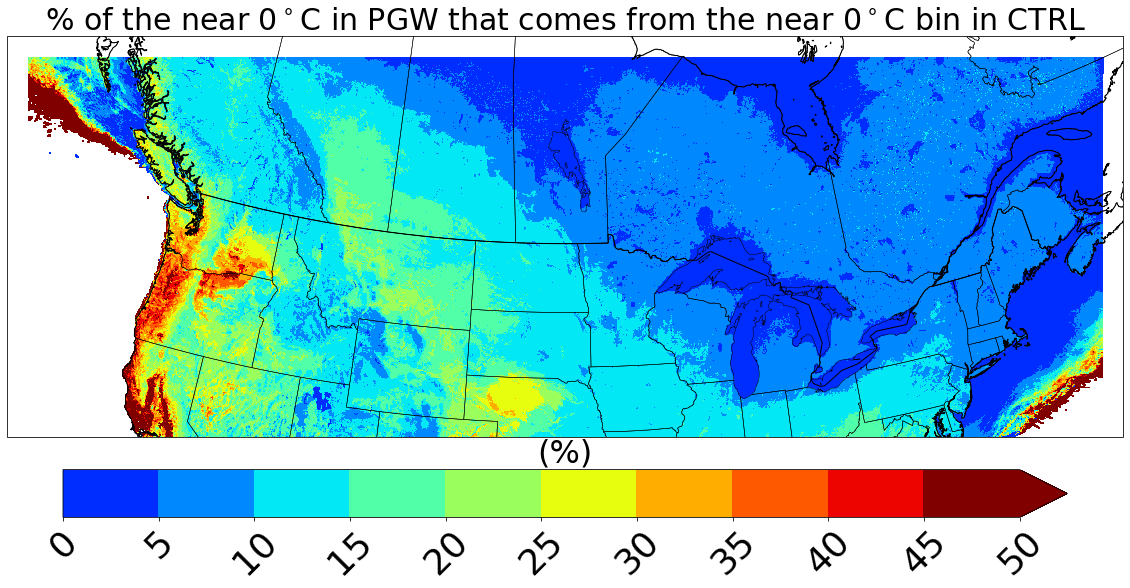

In [85]:
# How much of the near 0 peak in PGW comes from: Near 0C in CTRL
# total_near0PGW_near0CTRL / total_pgw_near0

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 50 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 5
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"% of the near 0${\rm ^\circ C}$ in PGW that comes from the near 0${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_near0PGW'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0PGW_near0CTRL.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-81-8ee8dc1ac727>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


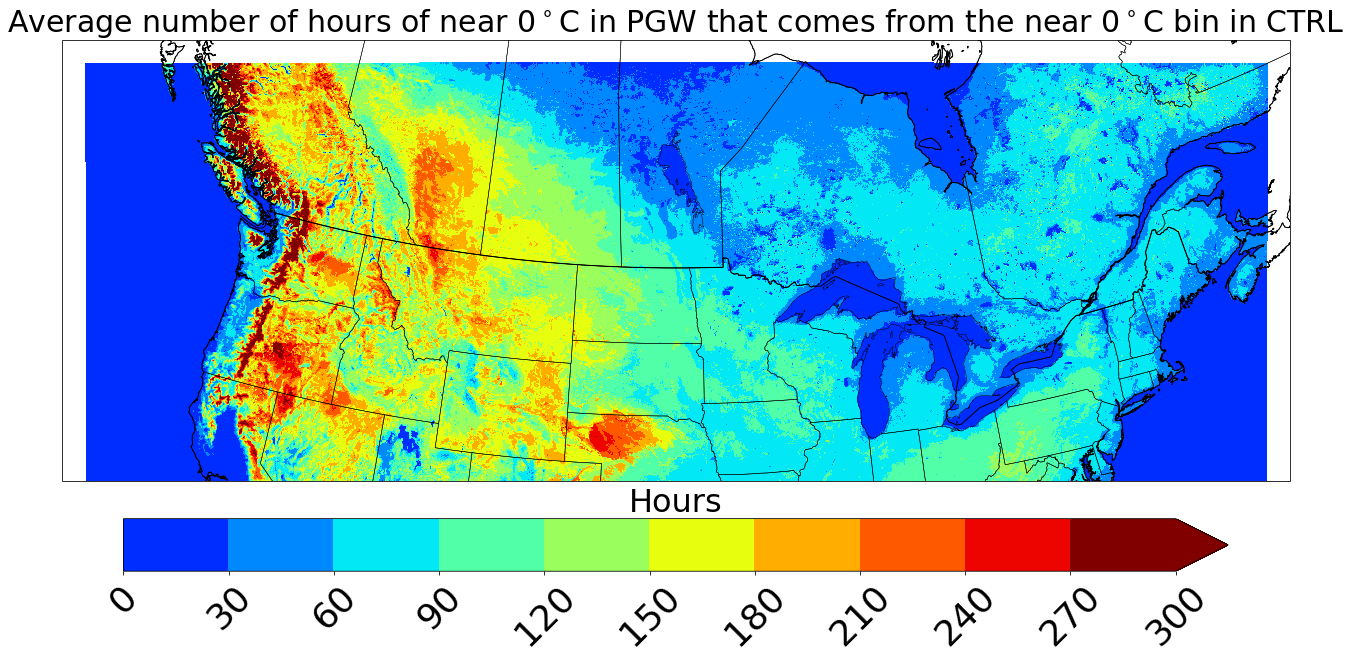

In [81]:
# How much of the near 0 peak in PGW comes from: Near 0C in CTRL
# total_near0PGW_near0CTRL ( NO perc)

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(22, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 300 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 30
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"Average number of hours of near 0${\rm ^\circ C}$ in PGW that comes from the near 0${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_near0CTRL'].values/13, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0PGW_near0CTRL_noPerc.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-16-c72f34735d4a>:32: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_m4PGW_m4CTRL'].values*100/aux1['total_m4PGW'].values, transform=ccrs.PlateCarree(),
<ipython-input-16-c72f34735d4a>:49: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


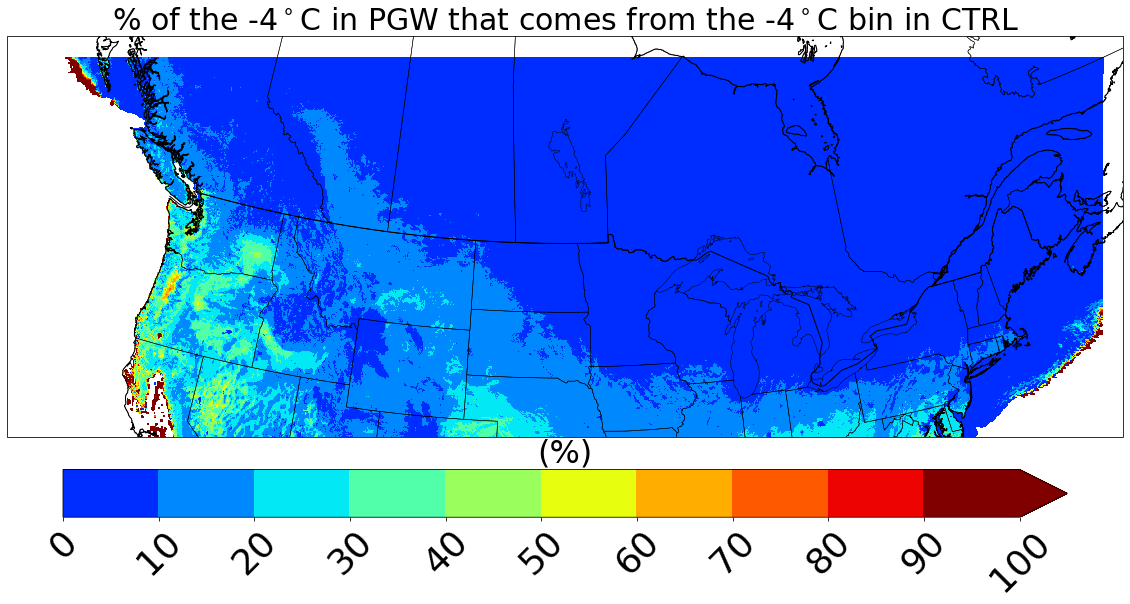

In [16]:
# How much of the -4 peak in PGW comes from: -4C in CTRL

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 100 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 10
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"% of the -4${\rm ^\circ C}$ in PGW that comes from the -4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_m4PGW_m4CTRL'].values*100/aux1['total_m4PGW'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('m4PGW_m4CTRL.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-17-e163ca74b70a>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


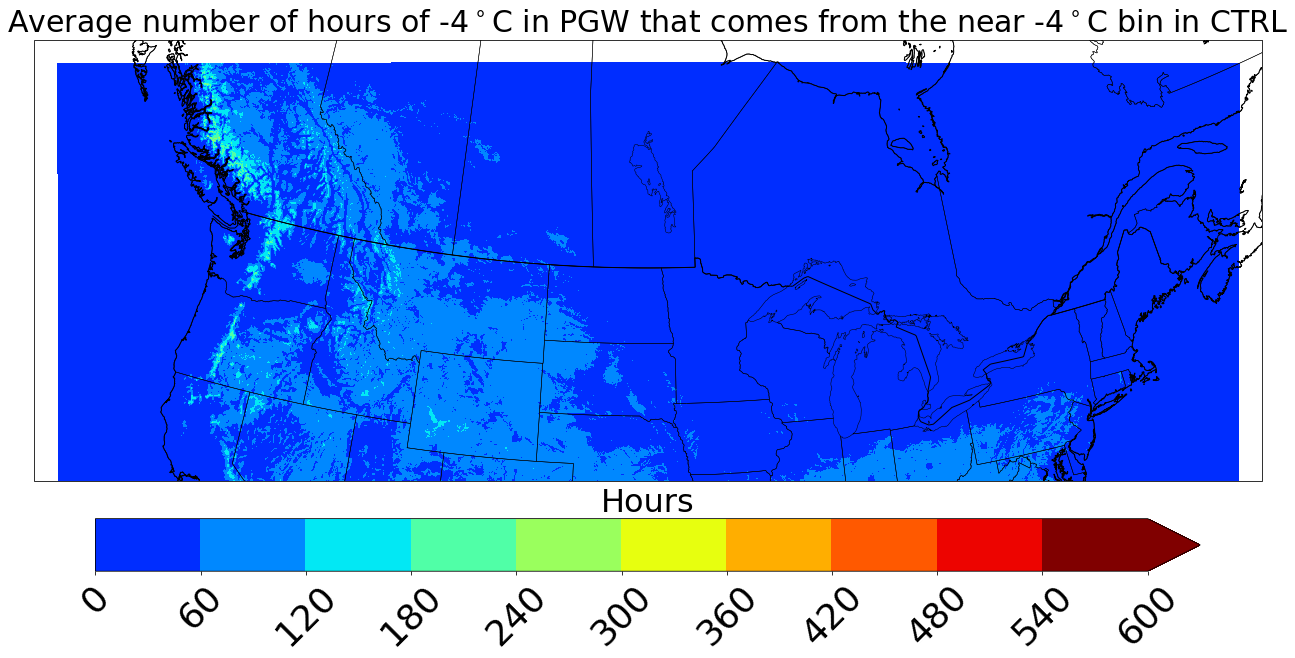

In [17]:
# How much of the -4 peak in PGW comes from: -4C in CTRL

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(22, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 600 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 60
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"Average number of hours of -4${\rm ^\circ C}$ in PGW that comes from the near -4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_m4PGW_m4CTRL'].values/13, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('m4PGW_m4CTRL_noPerc.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-18-7588cec5a049>:31: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_p4PGW_p4CTRL'].values*100/aux1['total_p4PGW'].values, transform=ccrs.PlateCarree(),
<ipython-input-18-7588cec5a049>:48: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


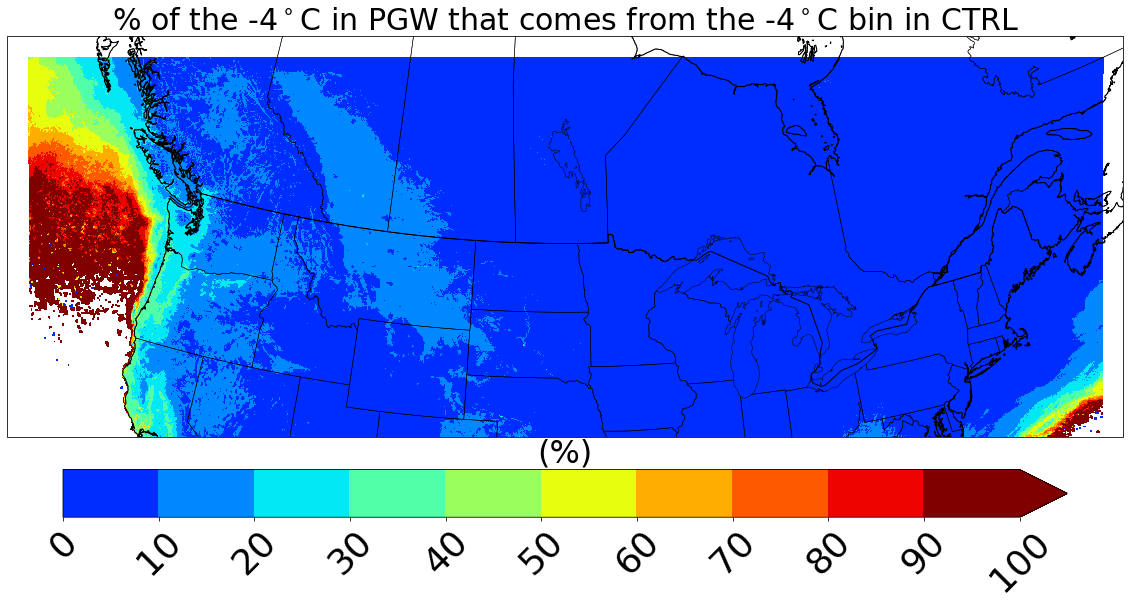

In [18]:
# How much of the +4 peak in PGW comes from: 4C in CTRL

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 100 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 10
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"% of the -4${\rm ^\circ C}$ in PGW that comes from the -4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_p4PGW_p4CTRL'].values*100/aux1['total_p4PGW'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('p4PGW_p4CTRL.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-19-a57cc339c1d7>:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


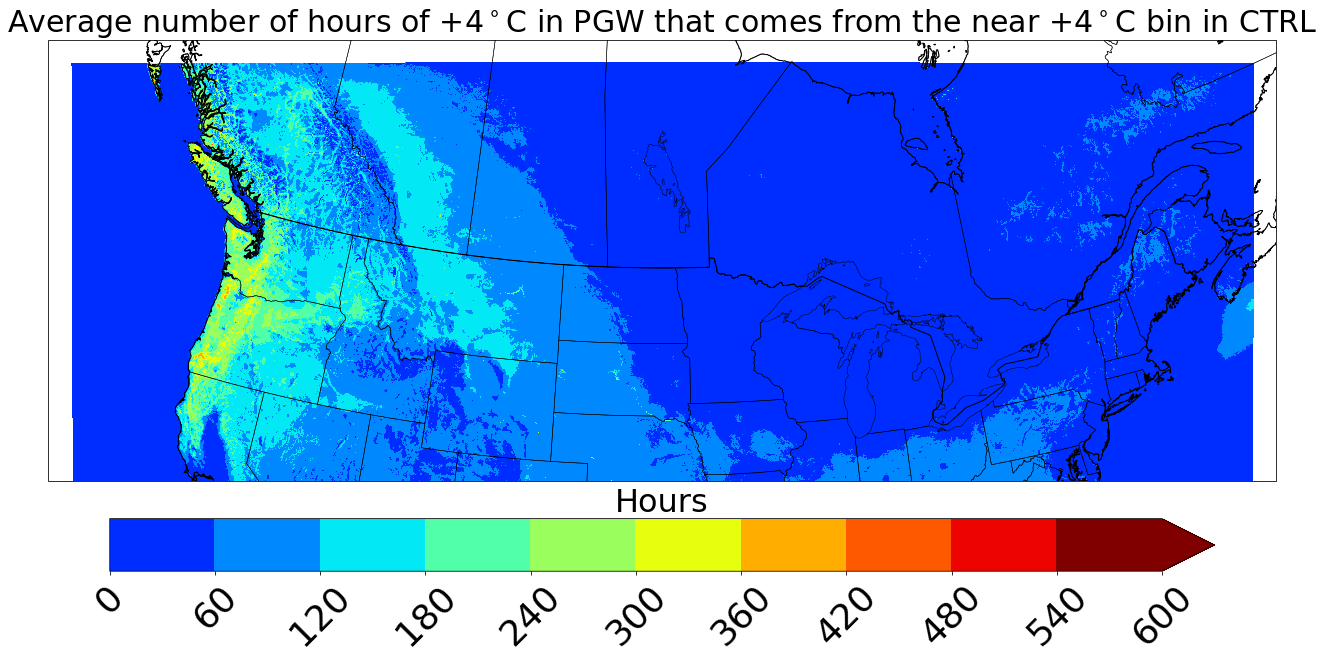

In [19]:
# How much of the +4 peak in PGW comes from: +4C in CTRL

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(22, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 600 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 60
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"Average number of hours of +4${\rm ^\circ C}$ in PGW that comes from the near +4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_p4PGW_p4CTRL'].values/13, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('p4PGW_p4CTRL_noPerc.png', facecolor='white', bbox_inches='tight')
plt.show()

In [17]:
p4p4 = aux1['total_p4PGW_p4CTRL'].values*100/aux1['total_p4PGW'].values
m4m4 = aux1['total_m4PGW_m4CTRL'].values*100/aux1['total_m4PGW'].values
n0n0 = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_near0PGW'].values

<ipython-input-17-4fe3a1cb55fc>:1: RuntimeWarning: invalid value encountered in true_divide
  p4p4 = aux1['total_p4PGW_p4CTRL'].values*100/aux1['total_p4PGW'].values
<ipython-input-17-4fe3a1cb55fc>:2: RuntimeWarning: invalid value encountered in true_divide
  m4m4 = aux1['total_m4PGW_m4CTRL'].values*100/aux1['total_m4PGW'].values
<ipython-input-17-4fe3a1cb55fc>:3: RuntimeWarning: invalid value encountered in true_divide
  n0n0 = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_near0PGW'].values


In [10]:
p4p4_CTRL = aux1['total_p4PGW_p4CTRL'].values*100/aux1['total_p4CTRL'].values
m4m4_CTRL = aux1['total_m4PGW_m4CTRL'].values*100/aux1['total_m4CTRL'].values
n0n0_CTRL = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_near0CTRL'].values

<ipython-input-10-05d967ab555f>:1: RuntimeWarning: invalid value encountered in true_divide
  p4p4_CTRL = aux1['total_p4PGW_p4CTRL'].values*100/aux1['total_p4CTRL'].values
<ipython-input-10-05d967ab555f>:2: RuntimeWarning: invalid value encountered in true_divide
  m4m4_CTRL = aux1['total_m4PGW_m4CTRL'].values*100/aux1['total_m4CTRL'].values
<ipython-input-10-05d967ab555f>:3: RuntimeWarning: invalid value encountered in true_divide
  n0n0_CTRL = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_near0CTRL'].values


In [11]:
def getMaxValues(var1, var2, var3):
                
    a = np.stack((var1[25:-25,25:-25],var2[25:-25,25:-25],var3[25:-25,25:-25]))
    
    maxValues = np.argmax(a, axis=0)
    
    return maxValues

In [12]:
maxVal_CTRL = getMaxValues(m4m4_CTRL,n0n0_CTRL,p4p4_CTRL)

In [18]:
maxVal = getMaxValues(m4m4,n0n0,p4p4)

In [ ]:
# Loading the possibilities data

In [13]:
# Opening the distribution files
fo = '/chinook/cruman/Data/Near0Events/Distribution'
# Get the average number of hours near 0
l = np.arange(-50,48,4)
xi = 1015 
yi = 1359 
dist = np.zeros((xi, yi, len(l)))
dist_pgw = np.zeros((xi, yi, len(l)))

t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")
        sim='CTRL'
        aux = pickle.load( open(f'{fo}/dist_{sim}_{y}_{m:02d}.p', 'rb'))
        #print(f'{fo}/t2m_{y}_{m:02d}.p')
        dist += aux
        sim = 'PGW'
        aux = pickle.load( open(f'{fo}/dist_{sim}_{y}_{m:02d}.p', 'rb'))
        dist_pgw += aux
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        

Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [14]:
# Function to find the two peaks in the distribution
def get_2peaks(dist):
    from scipy.signal import find_peaks

    #t = time.process_time()
    peaks, x = find_peaks(dist, height=0, distance=1)

    # get the first and second peak
    heights = x['peak_heights']
    sort_index = np.argsort(heights)
    first = peaks[sort_index[-1]]
    if len(sort_index) == 1:
        second = -1
    else:        
        second = peaks[sort_index[-2]]
    
    return first, second

# Finding the first and secondary peaks for CTRL
first = np.zeros((xi, yi))
second = np.zeros((xi, yi))

for i in range(first.shape[0]):
    for j in range(first.shape[1]):
        p1, p2 = get_2peaks(dist[i,j])
        first[i,j] = p1
        second[i,j] = p2
        
# Finding the first and secondary peaks for PGW
first_pgw = np.zeros((xi, yi))
second_pgw = np.zeros((xi, yi))

for i in range(first.shape[0]):
    for j in range(first.shape[1]):
        p1, p2 = get_2peaks(dist_pgw[i,j])
        first_pgw[i,j] = p1
        second_pgw[i,j] = p2

In [15]:
# Combines the first and second peak
first_second = np.where((first==13) | (second==13), 1, 0)
first_second_pgw = np.where((first_pgw==13) | (second_pgw==13), 1, 0)

c12p12 = np.where((first_second_pgw==1) & (first_second==1), 1., 0)
c12p0 = np.where((first_second_pgw==0) & (first_second==1), 2., 0)
c0p12 = np.where((first_second_pgw==1) & (first_second==0), 3., 0)
c0p0_p12 = np.where((first_second_pgw==0) & (first_second==0), 4., 0)

# First peak near 0
near0_p1_ctrl = np.where(first==13, 2, 0)
near0_p1_pgw = np.where(first_pgw==13, 2, 0)

# Second peak near 0
near0_p2_ctrl = np.where(second==13, 3, 0)
near0_p2_pgw = np.where(second_pgw==13, 3, 0)

# Combining the two to plot the map of first and secondary peak
near0_p1p2_ctrl = near0_p1_ctrl + near0_p2_ctrl
near0_p1p2_pgw = near0_p1_pgw + near0_p2_pgw

In [16]:
# Possibilities for the first peak
c1p1 = np.where((near0_p1_pgw==2) & (near0_p1_ctrl==2), 1., 0)
c1p0 = np.where((near0_p1_pgw==0) & (near0_p1_ctrl==2), 2., 0)
c0p1 = np.where((near0_p1_pgw==2) & (near0_p1_ctrl==0), 3., 0)
c0p0_p1 = np.where((near0_p1_pgw==0) & (near0_p1_ctrl==0), 4., 0)

# Possibilities for the second peak
c2p2 = np.where((near0_p2_pgw==3) & (near0_p2_ctrl==3), 1., 0)
c2p0 = np.where((near0_p2_pgw==0) & (near0_p2_ctrl==3), 2., 0)
c0p2 = np.where((near0_p2_pgw==3) & (near0_p2_ctrl==0), 3., 0)
c0p0_p2 = np.where((near0_p2_pgw==0) & (near0_p2_ctrl==0), 4., 0)

In [17]:
# Combinting everything to plot the map of the peaks
possibilities_p1 = c1p1+c0p1+c1p0+c0p0_p1
possibilities_p2 = c2p2+c0p2+c2p0+c0p0_p2
possibilities_p12 = c12p12+c0p12+c12p0+c0p0_p12

In [ ]:
# Merge the Possibilities stuff with the near0PGW_near0CTRL stuff

In [34]:
possibilities_p12.shape

(1015, 1359)

In [18]:
# calculations here - % of CTRL hours that stayed in the same temperature window in PGW
graph1_CTRL = maxVal_CTRL.copy().astype(float) + 0.5
graph1_CTRL[possibilities_p12[25:-25,25:-25] != 1] = np.nan

graph2_CTRL = maxVal_CTRL.copy().astype(float) + 0.5
graph2_CTRL[possibilities_p12[25:-25,25:-25] != 2] = np.nan

graph3_CTRL = maxVal_CTRL.copy().astype(float) + 0.5
graph3_CTRL[possibilities_p12[25:-25,25:-25] != 3] = np.nan

graph4_CTRL = maxVal_CTRL.copy().astype(float) + 0.5
graph4_CTRL[possibilities_p12[25:-25,25:-25] != 4] = np.nan

/home/cruman/.conda/envs/base_plus_caio/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-19-f6f183b4eebb>:101: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('values_CTRL_stayed_PGW.png', facecolor='white', bbox_inches='tight')


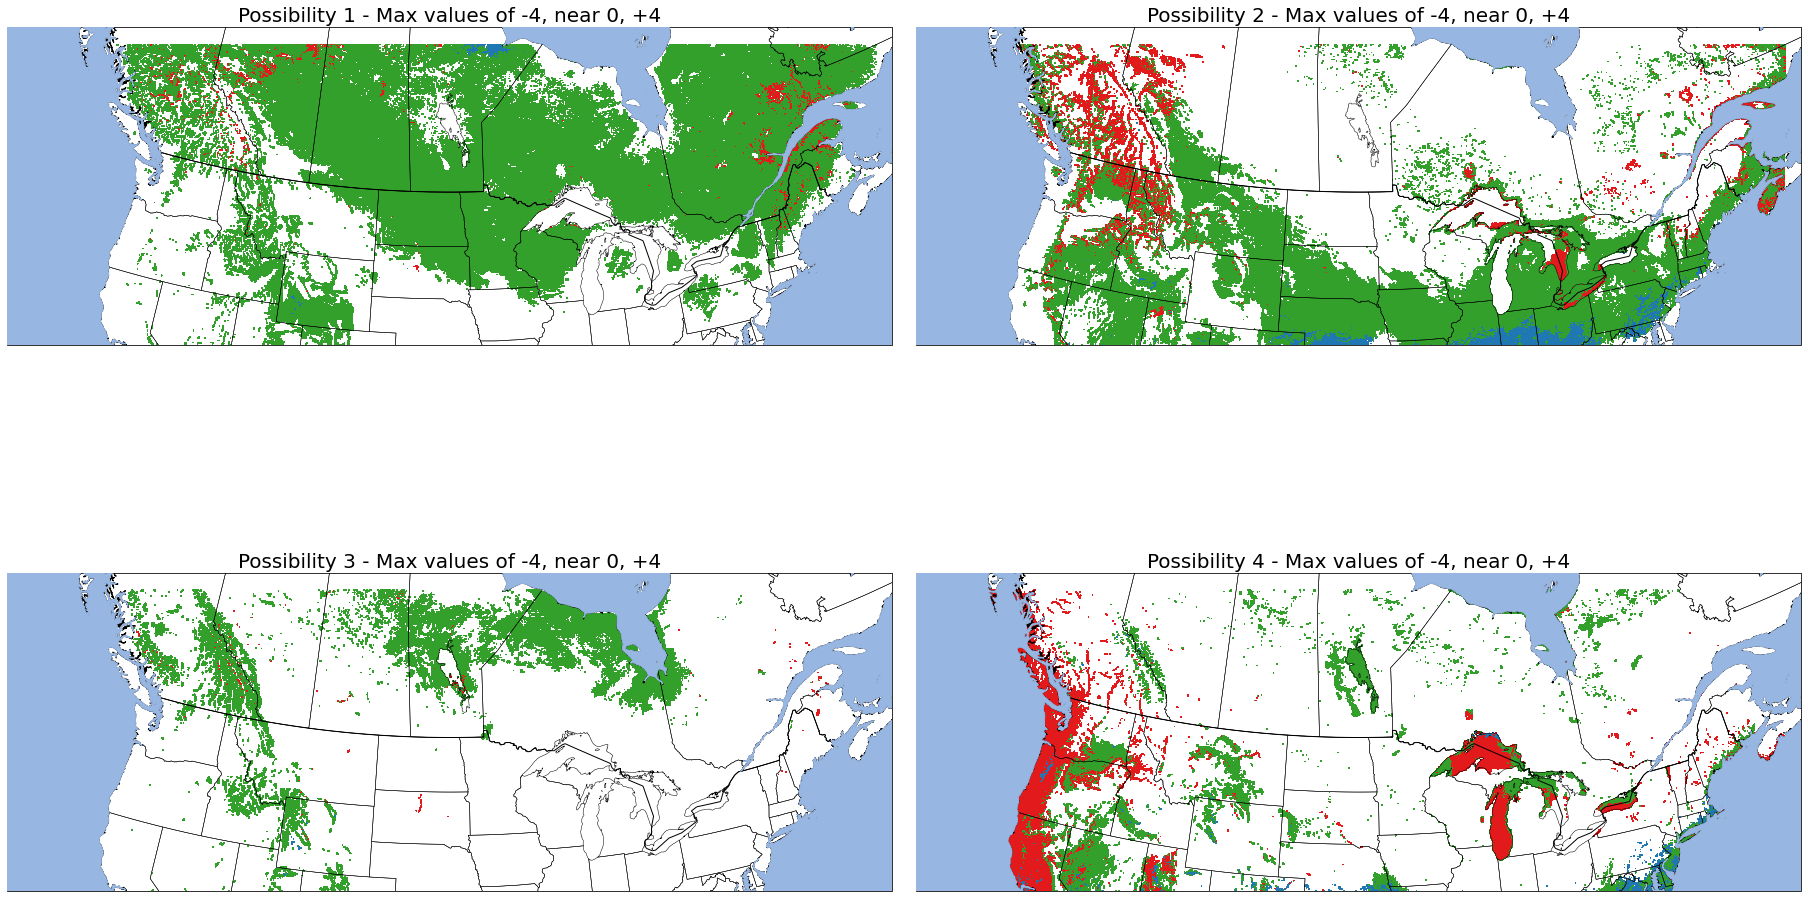

In [19]:
# Masking the plots made before with the P1 and P2 peaks

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(2, 2, figsize=(25, 15), subplot_kw={'projection': myLambert}, constrained_layout=True)

width = 1.0  

val_max = 4 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 1

cor = ['#1f78b4', '#33a02c', '#e31a1c', '#ffff99']
new_cmap = mpl.colors.ListedColormap(cor)

unit = ""
ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=len(cor))

title=r"Possibility 1 - Max values of -4, near 0, +4"

ax[0][0].set_extent([xll-6.6, xur-9.65, 36, yur+2])

# Plot figure
cs = ax[0][0].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph1_CTRL, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
#cb = f.colorbar(cs, ax=ax[0], ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.7, extend="max")        
#cb.ax.set_title(unit, fontsize=28)
#cb.ax.tick_params(labelsize=28, labelrotation=45)
        
ax[0][0].set_title(title, fontsize=20)

ax[0][0].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[0][0].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[0][0].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[0][0].add_feature(cfeature.OCEAN, zorder=10)

# #########################
# Plot 2
title=r"Possibility 2 - Max values of -4, near 0, +4"

ax[0][1].set_extent([xll-6.6, xur-9.65, 36, yur+2])

# Plot figure
cs = ax[0][1].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph2_CTRL, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
#cb = f.colorbar(cs, ax=ax[2], ticks=color_ticks,orientation="vertical",pad=0.05,shrink=0.9, extend="neither")        
#cb.ax.set_title(unit, fontsize=32)
#cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax[0][1].set_title(title, fontsize=20)

ax[0][1].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[0][1].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[0][1].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[0][1].add_feature(cfeature.OCEAN, zorder=10)

##############
# Plot 3

# Plot figure

cs = ax[1][0].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph3_CTRL, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
ax[1][0].set_extent([xll-6.6, xur-9.65, 36, yur+2])
# Plot colorbar

title=r"Possibility 3 - Max values of -4, near 0, +4"
ax[1][0].set_title( title, fontsize=20)

ax[1][0].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[1][0].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[1][0].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[1][0].add_feature(cfeature.OCEAN, zorder=10)

##############
# Plot 4

# Plot figure

cs = ax[1][1].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph4_CTRL, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
ax[1][1].set_extent([xll-6.6, xur-9.65, 36, yur+2])
# Plot colorbar

title=r"Possibility 4 - Max values of -4, near 0, +4"
ax[1][1].set_title( title, fontsize=20)

ax[1][1].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[1][1].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[1][1].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[1][1].add_feature(cfeature.OCEAN, zorder=10)

plt.savefig('values_CTRL_stayed_PGW.png', facecolor='white', bbox_inches='tight')
plt.show()

In [42]:
# calculations here - PGW in PGW
graph1 = maxVal.copy().astype(float) + 0.5
graph1[possibilities_p12[25:-25,25:-25] != 1] = np.nan

graph2 = maxVal.copy().astype(float) + 0.5
graph2[possibilities_p12[25:-25,25:-25] != 2] = np.nan

graph3 = maxVal.copy().astype(float) + 0.5
graph3[possibilities_p12[25:-25,25:-25] != 3] = np.nan

graph4 = maxVal.copy().astype(float) + 0.5
graph4[possibilities_p12[25:-25,25:-25] != 4] = np.nan

In [19]:
# calculations here
# now for the possibility 1
graph1 = maxVal.copy().astype(float) + 0.5
graph1[possibilities_p1[25:-25,25:-25] != 1] = np.nan

graph2 = maxVal.copy().astype(float) + 0.5
graph2[possibilities_p1[25:-25,25:-25] != 2] = np.nan

graph3 = maxVal.copy().astype(float) + 0.5
graph3[possibilities_p1[25:-25,25:-25] != 3] = np.nan

graph4 = maxVal.copy().astype(float) + 0.5
graph4[possibilities_p1[25:-25,25:-25] != 4] = np.nan

In [53]:
first_ctrl_pgw = np.where((first==13) & (first_pgw==13), 1, 0)

<ipython-input-46-ab5bd91865e5>:101: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('test2.png', facecolor='white', bbox_inches='tight')


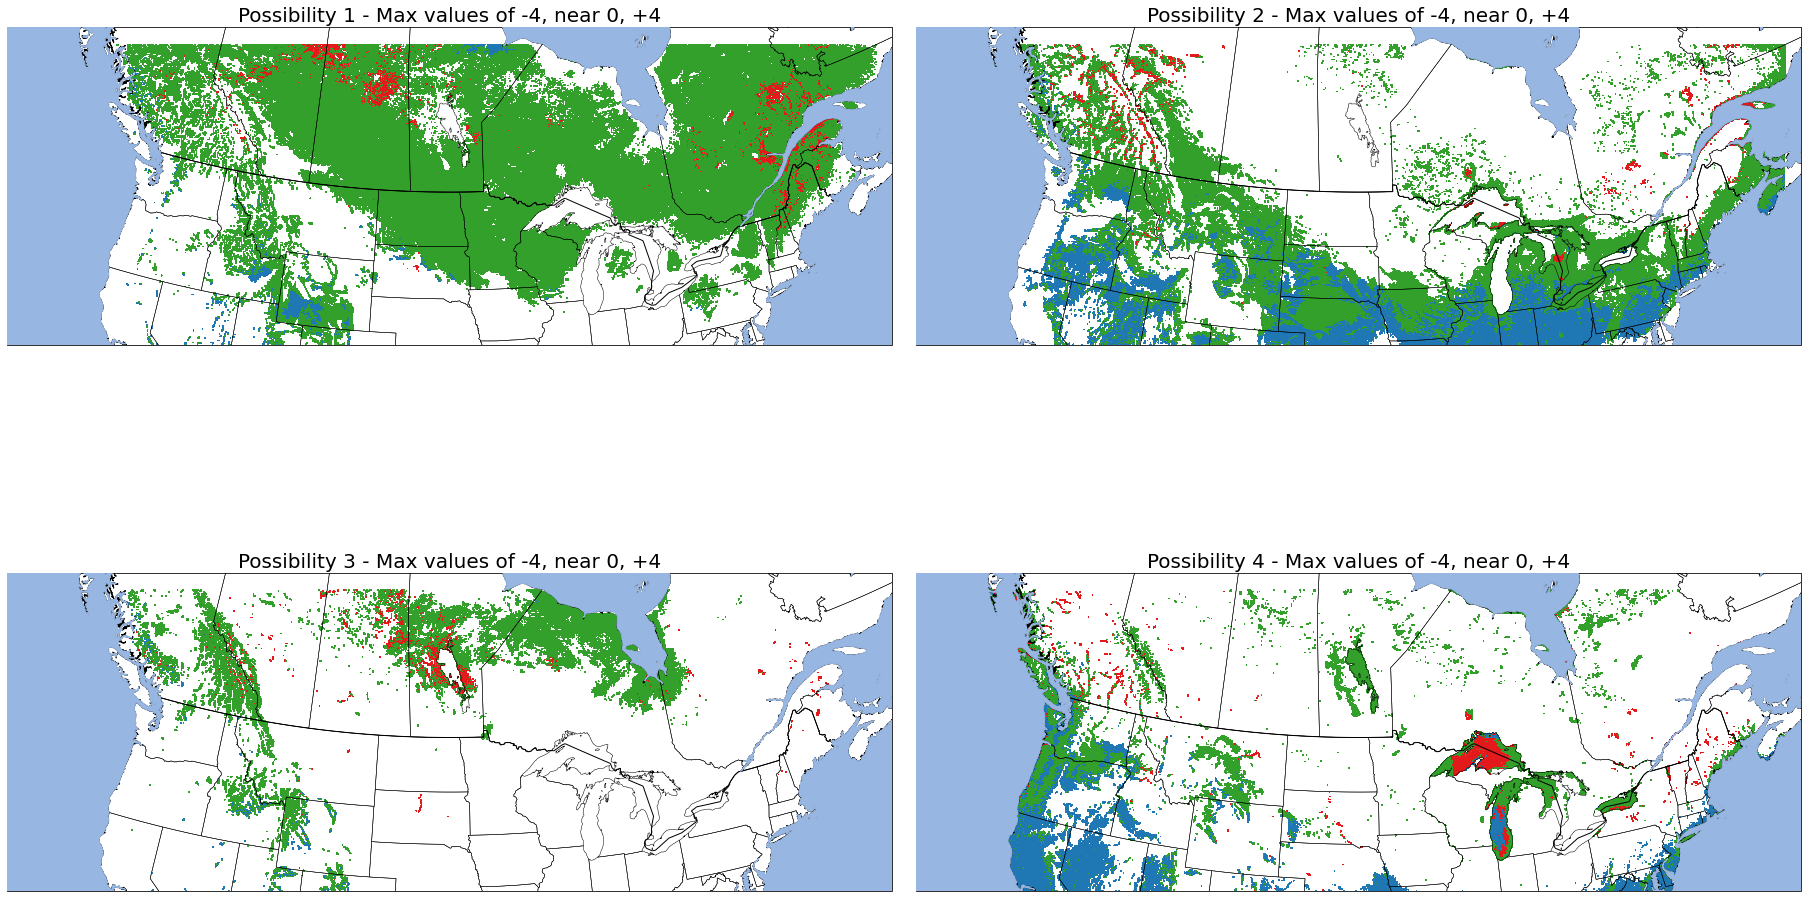

In [46]:
# Masking the plots made before with the P1 and P2 peaks

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(2, 2, figsize=(25, 15), subplot_kw={'projection': myLambert}, constrained_layout=True)

width = 1.0  

val_max = 4 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 1

cor = ['#1f78b4', '#33a02c', '#e31a1c', '#ffff99']
new_cmap = mpl.colors.ListedColormap(cor)

unit = ""
ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=len(cor))

title=r"Possibility 1 - Max values of -4, near 0, +4"

ax[0][0].set_extent([xll-6.6, xur-9.65, 36, yur+2])

# Plot figure
cs = ax[0][0].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph1, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
#cb = f.colorbar(cs, ax=ax[0], ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.7, extend="max")        
#cb.ax.set_title(unit, fontsize=28)
#cb.ax.tick_params(labelsize=28, labelrotation=45)
        
ax[0][0].set_title(title, fontsize=20)

ax[0][0].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[0][0].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[0][0].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[0][0].add_feature(cfeature.OCEAN, zorder=10)

# #########################
# Plot 2
title=r"Possibility 2 - Max values of -4, near 0, +4"

ax[0][1].set_extent([xll-6.6, xur-9.65, 36, yur+2])

# Plot figure
cs = ax[0][1].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph2, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
#cb = f.colorbar(cs, ax=ax[2], ticks=color_ticks,orientation="vertical",pad=0.05,shrink=0.9, extend="neither")        
#cb.ax.set_title(unit, fontsize=32)
#cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax[0][1].set_title(title, fontsize=20)

ax[0][1].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[0][1].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[0][1].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[0][1].add_feature(cfeature.OCEAN, zorder=10)

##############
# Plot 3

# Plot figure

cs = ax[1][0].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph3, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
ax[1][0].set_extent([xll-6.6, xur-9.65, 36, yur+2])
# Plot colorbar

title=r"Possibility 3 - Max values of -4, near 0, +4"
ax[1][0].set_title( title, fontsize=20)

ax[1][0].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[1][0].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[1][0].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[1][0].add_feature(cfeature.OCEAN, zorder=10)

##############
# Plot 4

# Plot figure

cs = ax[1][1].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph4, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
ax[1][1].set_extent([xll-6.6, xur-9.65, 36, yur+2])
# Plot colorbar

title=r"Possibility 4 - Max values of -4, near 0, +4"
ax[1][1].set_title( title, fontsize=20)

ax[1][1].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[1][1].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[1][1].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[1][1].add_feature(cfeature.OCEAN, zorder=10)

plt.savefig('test2.png', facecolor='white', bbox_inches='tight')
plt.show()

/home/cruman/.conda/envs/base_plus_caio/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-20-8990a5420eaf>:101: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('test2_possibility1.png', facecolor='white', bbox_inches='tight')


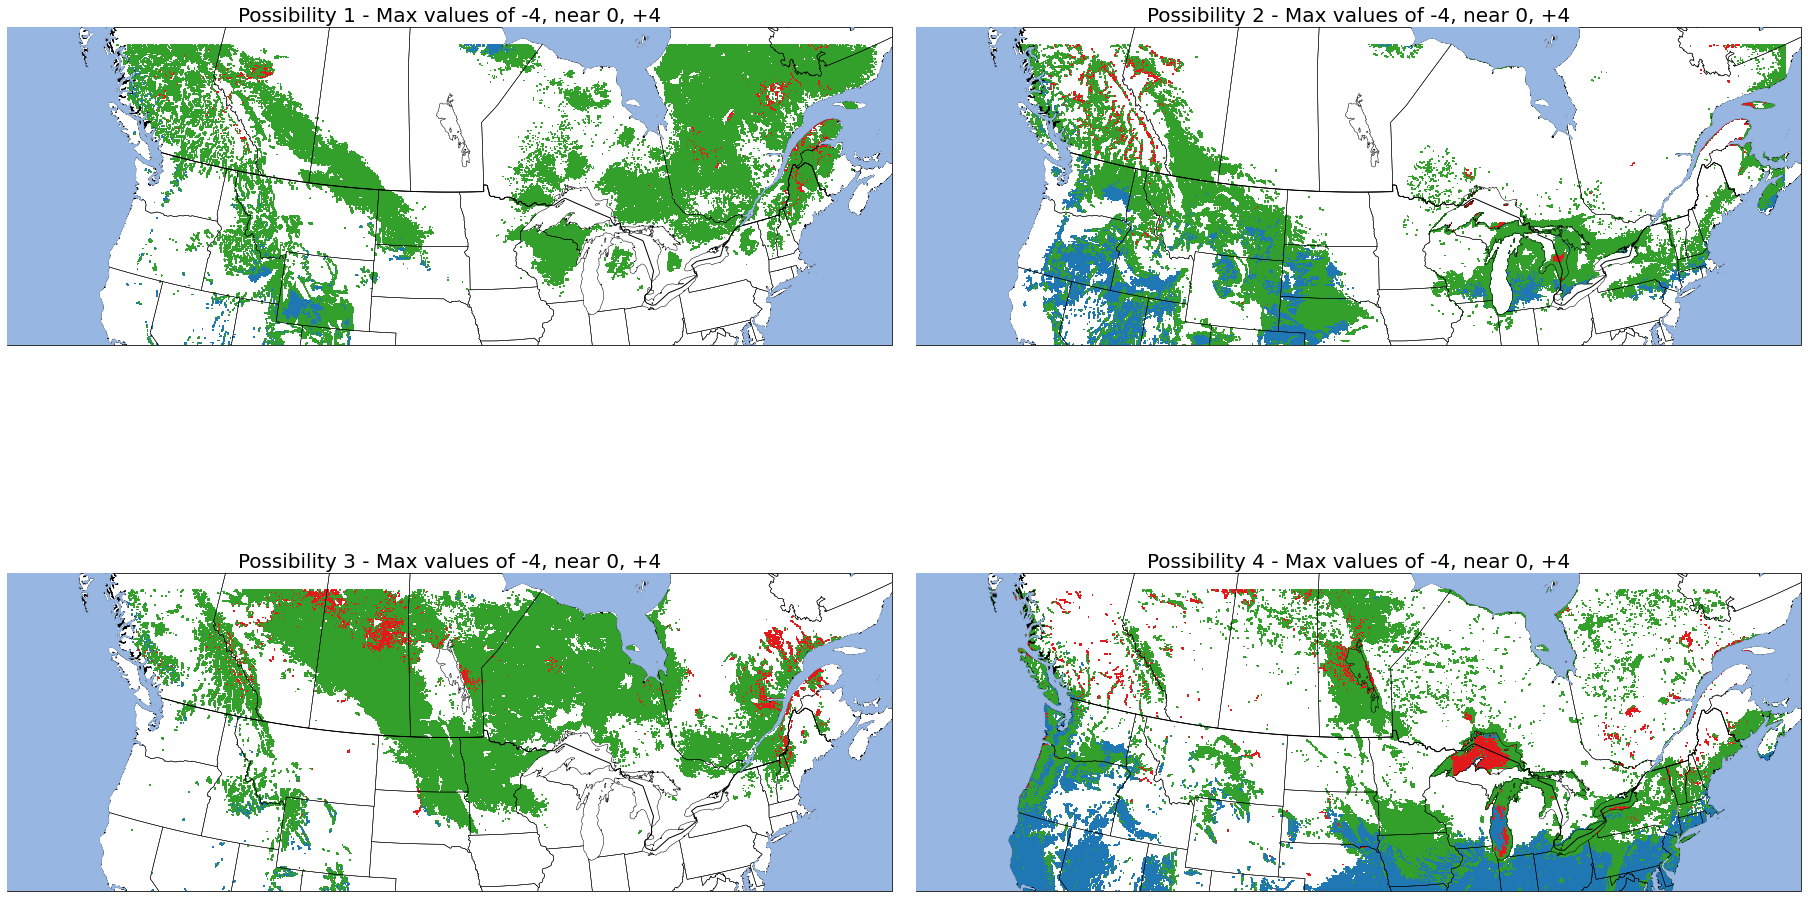

In [20]:
# Masking the plots made before with the P1 peaks

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(2, 2, figsize=(25, 15), subplot_kw={'projection': myLambert}, constrained_layout=True)

width = 1.0  

val_max = 4 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 1

cor = ['#1f78b4', '#33a02c', '#e31a1c', '#ffff99']
new_cmap = mpl.colors.ListedColormap(cor)

unit = ""
ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=len(cor))

title=r"Possibility 1 - Max values of -4, near 0, +4"

ax[0][0].set_extent([xll-6.6, xur-9.65, 36, yur+2])

# Plot figure
cs = ax[0][0].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph1, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
#cb = f.colorbar(cs, ax=ax[0], ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.7, extend="max")        
#cb.ax.set_title(unit, fontsize=28)
#cb.ax.tick_params(labelsize=28, labelrotation=45)
        
ax[0][0].set_title(title, fontsize=20)

ax[0][0].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[0][0].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[0][0].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[0][0].add_feature(cfeature.OCEAN, zorder=10)

# #########################
# Plot 2
title=r"Possibility 2 - Max values of -4, near 0, +4"

ax[0][1].set_extent([xll-6.6, xur-9.65, 36, yur+2])

# Plot figure
cs = ax[0][1].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph2, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
#cb = f.colorbar(cs, ax=ax[2], ticks=color_ticks,orientation="vertical",pad=0.05,shrink=0.9, extend="neither")        
#cb.ax.set_title(unit, fontsize=32)
#cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax[0][1].set_title(title, fontsize=20)

ax[0][1].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[0][1].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[0][1].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[0][1].add_feature(cfeature.OCEAN, zorder=10)

##############
# Plot 3

# Plot figure

cs = ax[1][0].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph3, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
ax[1][0].set_extent([xll-6.6, xur-9.65, 36, yur+2])
# Plot colorbar

title=r"Possibility 3 - Max values of -4, near 0, +4"
ax[1][0].set_title( title, fontsize=20)

ax[1][0].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[1][0].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[1][0].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[1][0].add_feature(cfeature.OCEAN, zorder=10)

##############
# Plot 4

# Plot figure

cs = ax[1][1].pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], graph4, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
ax[1][1].set_extent([xll-6.6, xur-9.65, 36, yur+2])
# Plot colorbar

title=r"Possibility 4 - Max values of -4, near 0, +4"
ax[1][1].set_title( title, fontsize=20)

ax[1][1].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[1][1].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[1][1].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
ax[1][1].add_feature(cfeature.OCEAN, zorder=10)

plt.savefig('test2_possibility1.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-49-cdea4356468c>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


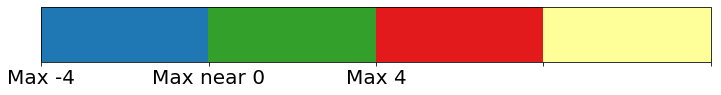

In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 2))
fig.subplots_adjust(bottom=0.5)

#cmap = mpl.cm.cool
#norm = mpl.colors.Normalize(vmin=5, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=new_cmap,
                                norm=norm,
                                orientation='horizontal')

cb1.ax.set_xticklabels(['Max -4', 'Max near 0', 'Max 4', ' ', ' '])
cb1.ax.tick_params(labelsize=20) 
fig.show()

<ipython-input-24-af0f47c2e4a0>:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


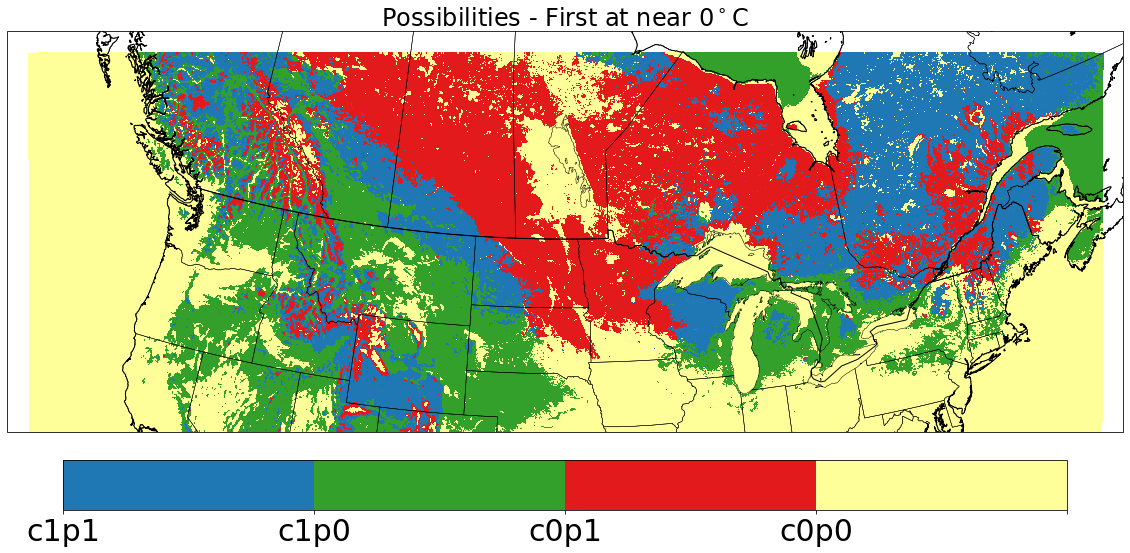

In [24]:
# Possibilities - P1
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 5 #np.max(aux1['total_day'].values)
val_min = 1
val_int = 1
#new_cmap = plt.cm.jet
cor = ['#8dd3c7','#ffffb3','#bebada','#fb8072']
cor = ['#1f78b4', '#33a02c', '#e31a1c', '#ffff99']
new_cmap = mpl.colors.ListedColormap(cor)
unit = ""
title = r"Possibilities - First at near 0${\rm ^\circ C}$"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-10, xur-5.5, 36, yur+3.2])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=4)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values[25:-25,25:-25], aux1['XLAT'].values[25:-25,25:-25], possibilities_p1[25:-25,25:-25], transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=0, vmax=val_max, norm=norm)

#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9)
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30) 
cb.ax.set_xticklabels(['c1p1', 'c1p0', 'c0p1', 'c0p0', ' '])
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('possibilities_p1.png')
#plt.show()